Môn học: Lập trình phân tích dữ liệu 2

*   Họ và tên: Nguyễn Vũ Quốc Đại
*   MSSV: 17063671


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

Khai báo các hàm cần thiết

In [ ]:

df=pd.ExcelFile('/content/KQThiLyThuyet-26.12.2020_ca2.xls')

Đọc file dữ liệu excel

In [ ]:

result=df.parse('Sheet1')

Xem dữ liệu bảng Sheet1

In [ ]:

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STT        64 non-null     int64  
 1   Mã SV      64 non-null     int64  
 2   Họ đệm     64 non-null     object 
 3   Tên        64 non-null     object 
 4   Giới tính  64 non-null     object 
 5   Ngày sinh  60 non-null     object 
 6   Điểm       64 non-null     float64
 7   Điểm.1     64 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.1+ KB


Dùng hàm info() để xem thông tin bảng dữ liệu

1.   Bảng có 8 cột
2.   Có 64 sinh viên



In [ ]:
result.describe(include=['float64'])

,Điểm,Điểm.1
count,64.000000,64.000000
mean,5.315625,5.421875
std,1.205703,1.225453
min,0.000000,0.000000
25%,4.725000,4.875000
50%,5.400000,5.500000
75%,6.300000,6.500000
max,7.000000,7.000000


Dùng describe để xem các đại lượng mô tả của bảng dữ liệu:

1.   Có 64 sinh viên
2.   Giá trị trung bình là: 5,3
3.   Độ lệch chuẩn là: 1,2
4.   Giá trị nhỏ nhất là: 0
5.   Các giá trị tứ phân vị
6.   Giá trị lớn nhất là 7





In [ ]:

result.isnull().sum()


STT          0
Mã SV        0
Họ đệm       0
Tên          0
Giới tính    0
Ngày sinh    4
Điểm         0
Điểm.1       0
dtype: int64

Dùng result.isnull().sum() để kiểm tra xem trong bảng dữ liệu có bao nhiêu giá trị bị thiếu. Ta thấy cột giới tính bị thiếu 4 giá trị

In [ ]:
result['Ngày sinh'].describe()

count                      60
unique                     56
top       1999-05-07 00:00:00
freq                        2
Name: Ngày sinh, dtype: object

In [ ]:
result['Ngày sinh'].value_counts().idxmax()

datetime.datetime(1999, 5, 7, 0, 0)

Ta tiến hành xử lý các giá trị bị thiếu:

1.   Bước đầu là đếm trong cột Ngày sinh có giá trị nào xuất hiện nhiều nhất




In [ ]:
result['Ngày sinh'].fillna(result['Ngày sinh'].value_counts().idxmax(),inplace=True)

2. Ta tiến hành thay các giá trị thiếu bằng giá trị có tần xuất, xuất hiện nhiều nhất vừa tìm được

In [ ]:
result.isnull().sum()

STT          0
Mã SV        0
Họ đệm       0
Tên          0
Giới tính    0
Ngày sinh    0
Điểm         0
Điểm.1       0
dtype: int64

Tiến hành kiểm tra lại, ta thấy k còn cột nào bị thiếu dữ liệu

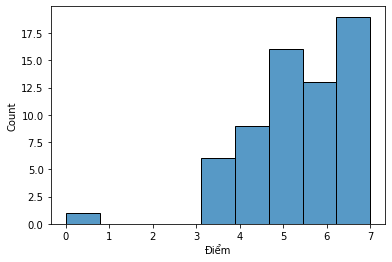

In [ ]:
sns.histplot(x=result['Điểm'])

Dùng hàm histplot để thể hiện sự tương quan của biến điểm, từ biểu đồ ta thấy được rằng:
1.   Điểm 7 có số lần xuất hiện nhiều nhất, hơn 17 lần
2.   Điểm 0 xuất hiện ít nhất, khoảng 1 lần
3.   Đa số điểm tập trung nhiều ở điểm 5, 6 và 7



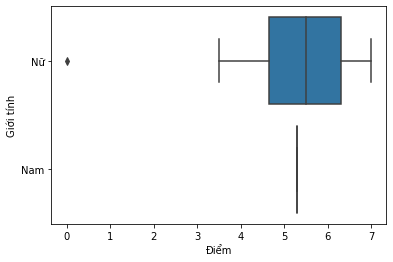

In [ ]:
sns.boxplot(x=result['Điểm'], y=result['Giới tính'])

Dùng hàm boxplot để thể hiện sự tương quan giữa Điểm và Giới tính, ta thấy:
1.   Đa số dữ liệu đều là giới tính nữ, chỉ có 1 dữ liệu là giới tính nam
2.   Điểm thấp nhất là 0, cao nhất là 7 điểm đều thuộc giới tính nữ
3.   Đa số điểm tập trung ở điểm 4, 5, 6
4.   Có giá trị trung bình khoảng 5,3 

